
Colorimetric observer models
============================

For silent substitution we quantify light in terms of photoreceptor excitation by computing a weighted integral:

\begin{equation}
w = \int\limits_{\lambda_1}^{\lambda_2}E(\lambda)V(\lambda)d\lambda
\end{equation}

Where $\lambda_1$ and $\lambda_2$ define the wavelength range, $E(\lambda)$ is the measured light spectrum (radiance or irradiance, in photons or watts), $V(\lambda)$ is the estimated sensitivity function of the photoreceptor in question, and $d\lambda$ is the size of the wavelength bins. 

When this operation concerns the spectral sensitivity functions of retinal photoreceptors, as in the example below, the resulting measures may be called [a-opic irradiance](https://files.cie.co.at/CIE%20S%20026%20alpha-opic%20Toolbox%20User%20Guide.pdf). 

\begin{equation}
w = \sum\limits_{380}^{780}E(\lambda)V(\lambda)\Delta\lambda
\end{equation}

![aopic irradiance](../../img/alphaopic_irradiance.svg)

The International Commission on Illumination (CIE) define [average colorimetric observer models](https://cie.co.at/publications/colorimetric-observers) (e.g., CIE 1931 Standard Colorimetric Observer) with estimates of the photoreceptor spectral sensitivities for a given age and field size. The estimates are based on decades of research involving predominantly psychophysical methods but also techniques such as microelectrode recording and microspectrophotometry of photoreceptors.  

*PySilSub* uses an `Observer` class to account for observer-related specifics. At present this is just a sensible placeholder for the photoreceptor action spectra but in the future it may be extended to better account for [inter-observer differences in ocular physiology](07b_prereceptoral_filtering.ipynb).


`pysilsub.observers.StandardColorimetricObserver`
-------------------------------------------------

The standard observer model for a 32-year-old observer and 10-degree field size. Default action spectra are normalised in the radiometric system. Data obtained from [www.cvrl.org](http://www.cvrl.org/database/text/intros/introod.htm).

Note that different values apply for the photon system and this requires a conversion.

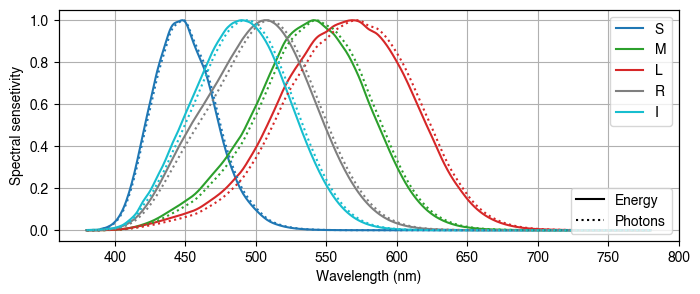

In [14]:
from pysilsub import observers 

observer = observers.StandardColorimetricObserver()
ax = observer.plot_action_spectra(figsize=(8, 3), grid=True, legend=True)

# Conversion for photon system
observer.action_spectra = (
    observer.action_spectra.apply(  # Multiply by wavelength
        lambda col: col * col.index * (5.05e15))
    .apply(lambda col: col / col.max())
)
observer.plot_action_spectra(ax=ax, grid=True, ls=':', legend=False)
twinax = ax.twinx()
twinax.plot([], ls='-', c='k', label='Energy')
twinax.plot([], ls=':', c='k', label='Photons')
twinax.set_yticks([])
twinax.legend(loc='lower right');


`pysilsub.observers.IndividualColorimetricObserver`
---------------------------------------------------

EXPERIMENTAL: This observer class allows for the spectral sensitivities to be adjusted for the effects of age (20-80 years) and field size (1&deg; - 10&deg;) in accordance with [CIE 170-1:2006](https://cie.co.at/publications/fundamental-chromaticity-diagram-physiological-axes-part-1). Currently only LMS are adjusted but it will also be possible to build rod and melanopsin fundamentals that account for age and field size. 


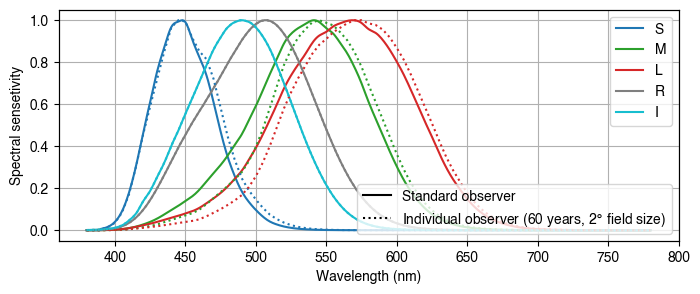

In [13]:
standard_observer = observers.StandardColorimetricObserver()
individual_observer = observers.IndividualColorimetricObserver(age=60, field_size=2)

ax = standard_observer.plot_action_spectra(figsize=(8, 3), grid=True)
individual_observer.plot_action_spectra(ax=ax, ls=':', grid=True, legend=False)

twinax = ax.twinx()
twinax.plot([], ls='-', c='k', label='Standard observer')
twinax.plot([], ls=':', c='k', label='Individual observer (60 years, 2$\degree$ field size)')
twinax.set_yticks([])
twinax.legend(loc='lower right');